In [1]:
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# The Limitation of Multi-criteria Decision Analysis
This python script is used to create synthetic environmental saftey and sustianbility scenarios and to show that many vastly different scenarios may have identical MCDA scores. Thus, there is a need to elaborate the MOOP appraoch to combine saftey and sustainability.

## Step 1: Generating Synthetic Data
The following cell generates synthetic saftey and sustainbility scores using random number generation. The idea is to obtian values between 0 - 1, representing **normalized saftey and sustianbility scores**. Let us assume that individual combinations of saftey and sustianbility scores correspond to specifc lifecycle scenarios. Normalization of criteria scores based on conversion functions is a common practice in MCDA prioir to aggregation and obtaining the MCDA score.

In [2]:
#Generating 500 random values for saftey and sustianbility with normalized scores ranging between 0 - 1
saf_scores = np.random.uniform(0,1,(500,))
sus_scores = np.random.uniform(0,1,(500,))

Text(0.5, 1.0, 'Synthetic Lifecycle Scenarios')

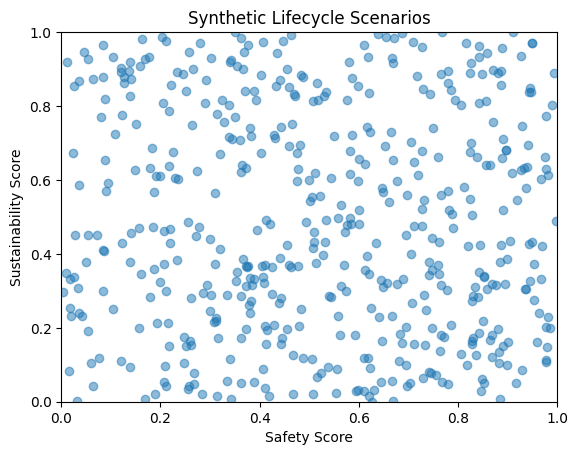

In [3]:
#Visualizing all synthetic lifecycle scenarios
plt.figure()
plt.scatter(saf_scores, sus_scores, alpha = 0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("Safety Score")
plt.ylabel("Sustainability Score")
plt.title("Synthetic Lifecycle Scenarios")

## Step 2: Identifying MCDA Aggregation Methods
For this analysis, we consider **4 MCDA aggregation approaches** using the normalized saftey ($saf$) and sustainability ($sus$) scores to obtain MCDA score ($c$):
1. **Arithemetic Mean:**
  
   $c = \frac{saf + sus}{2}$
4. **Weighted Arithemetic Mean:**
  
   $c = \frac{w_1\times saf + w_1\times sus}{2}$, weights ($w_1$ and $w_2$) are allocated to saftey and sustainability
7. **Geometric Mean:**
  
   $c = \sqrt{saf\times sus}$
10. **Harmonic Mean:**
   
    $c = \frac{2}{\frac{1}{saf}+\frac{1}{sus}}$

The following cells create functions that model the aforementioned MCDA aggregation methods in their equaltion form, with the generic form $y = ax + b$, where $y, x, a, b,$ correspond to $sus, saf, w1, c$ parameters that have been accordingly adapted.  

In [4]:
#1. Arithermatic Mean
def ArtMean(x,b):
    return b - x
#2. Weighted Arithematic Mean, where w1 + w2 = 1
def WtArtMean(x,b,a,w2):
    return (b - a*x)/w2
#3. Geometric Mean
def GeoMean(x,b):
    return (b**2)/x
#4. Harmonic Mean
def HarMean(x,b):
    return (1/((2/b)-(1/x)))

In [5]:
#Defining a series 'x' containing values between 0 - 1
xlist = np.linspace(0, 1, num = 1000)

The array $x$ is created above to feed into the above defined functions so that $y$ values could be calculated for a constant $b$. The logic is to define $saf$ scores within $x$ and then use them to calculate $sus$ scores for a constant $b$, i.e. the MCDA score $c$. In this manner it will be possible to define lines and curves containing points with identical MCDA scores.

# Step 3: Plotting Curves representing Identical MCDA Scores
The synthetic lifeycle scenarios are then conextualized against curves representing identical MCDA scores, i.e. all ponts lying on these curves would have identical MCDA scores. Thus, **despite 2 points having vastly different safety and sustainability scores, the MCDA scores would be identical as long as they lie on the same curve**. This is the shortcoming of the MCDA approach that inspired consideration of the MOOP approach, so as to better capture intricacies of lifecycles.

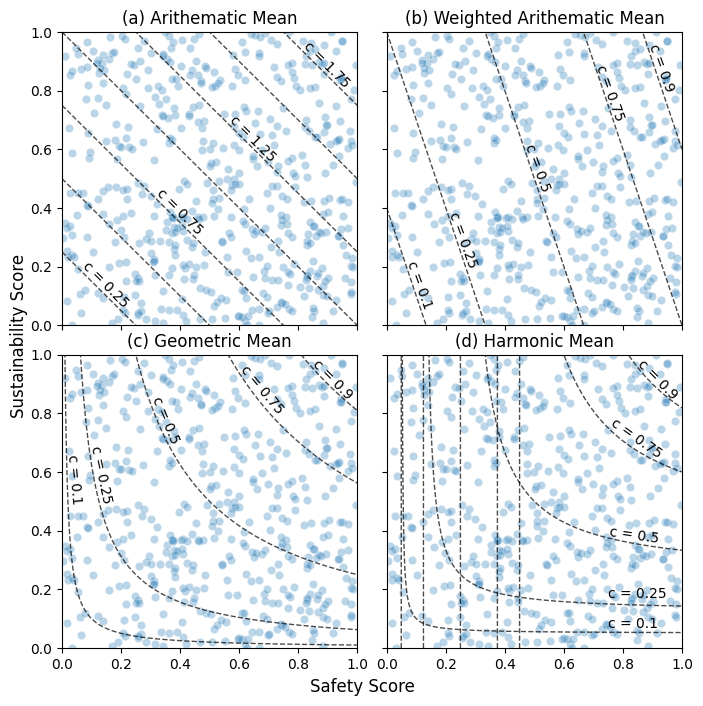

In [6]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(4*cols,4*rows), sharex = True, sharey = True)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
fig.supxlabel('Safety Score', x = 0.5, y = 0.05)
fig.supylabel('Sustainability Score', x = 0.06, y = 0.5)
#Arithematic Mean Graph
axes[0][0].set_title('(a) Arithematic Mean', fontsize=12)
axes[0][0].set_xlim(-0,1)
axes[0][0].set_ylim(-0,1)
#axes[0][0].set_ylabel("Sustianbility Score")
sns.scatterplot(x = saf_scores, y = sus_scores, ax = axes[0][0], alpha = 0.3)
sns.lineplot(x = xlist, y = ArtMean(xlist,0.25), ax = axes[0][0], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[0][0].text(0.06, 0.06, "c = 0.25", rotation = -45)     
sns.lineplot(x = xlist, y = ArtMean(xlist,0.5), ax = axes[0][0], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
sns.lineplot(x = xlist, y = ArtMean(xlist,0.75), ax = axes[0][0], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[0][0].text(0.31, 0.31, "c = 0.75", rotation = -45)
sns.lineplot(x = xlist, y = ArtMean(xlist,1), ax = axes[0][0], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
sns.lineplot(x = xlist, y = ArtMean(xlist,1.25), ax = axes[0][0], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[0][0].text(0.56, 0.56, "c = 1.25", rotation = -45)
sns.lineplot(x = xlist, y = ArtMean(xlist,1.5), ax = axes[0][0], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
sns.lineplot(x = xlist, y = ArtMean(xlist,1.75), ax = axes[0][0], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[0][0].text(0.81, 0.81, "c = 1.75", rotation = -45)

# Weighted Arithematic Mean Graph
axes[0][1].set_title('(b) Weighted Arithematic Mean', fontsize=12)
#axes[0][1].set_xlim(0,1)
#axes[0][1].set_ylim(0,1)
sns.scatterplot(x = saf_scores, y = sus_scores, ax = axes[0][1], alpha = 0.3)
sns.lineplot(x = xlist, y = WtArtMean(xlist,0.1,0.75,0.25), ax = axes[0][1], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[0][1].text(0.06, 0.06, "c = 0.1", rotation = -70)     
sns.lineplot(x = xlist, y = WtArtMean(xlist,0.25,0.75,0.25), ax = axes[0][1], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[0][1].text(0.2, 0.2, "c = 0.25", rotation = -70)     
sns.lineplot(x = xlist, y = WtArtMean(xlist,0.5,0.75,0.25), ax = axes[0][1], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[0][1].text(0.46, 0.46, "c = 0.5", rotation = -70)   
sns.lineplot(x = xlist, y = WtArtMean(xlist,0.75,0.75,0.25), ax = axes[0][1], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[0][1].text(0.7, 0.7, "c = 0.75", rotation = -70)    
sns.lineplot(x = xlist, y = WtArtMean(xlist,0.9,0.75,0.25), ax = axes[0][1], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[0][1].text(0.88, 0.8, "c = 0.9", rotation = -70)    

#Geomtric Mean Graph
axes[1][0].set_title('(c) Geometric Mean', fontsize=12)
#axes[1][0].set_xlim(0,1)
#axes[1][0].set_ylim(0,1)
#axes[1][0].set_ylabel("Sustianbility Score")
#axes[1][0].set_xlabel("Safety Score")
sns.scatterplot(x = saf_scores, y = sus_scores, ax = axes[1][0], alpha = 0.3)
sns.lineplot(x = xlist[1:], y = GeoMean(xlist[1:],0.1), ax = axes[1][0], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[1][0].text(0.01, 0.5, "c = 0.1", rotation = -85)     
sns.lineplot(x = xlist[1:], y = GeoMean(xlist[1:],0.25), ax = axes[1][0], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[1][0].text(0.088, 0.5, "c = 0.25", rotation = -78)     
sns.lineplot(x = xlist[1:], y = GeoMean(xlist[1:],0.5), ax = axes[1][0], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[1][0].text(0.295, 0.7, "c = 0.5", rotation = -67)     
sns.lineplot(x = xlist[1:], y = GeoMean(xlist[1:],0.75), ax = axes[1][0], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[1][0].text(0.595, 0.8, "c = 0.75", rotation = -50)     
sns.lineplot(x = xlist[1:], y = GeoMean(xlist[1:],0.9), ax = axes[1][0], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[1][0].text(0.84, 0.85, "c = 0.9", rotation = -45)     

#Harmonic Mean Graph
axes[1][1].set_title('(d) Harmonic Mean', fontsize=12)
#axes[1][1].set_xlim(0,1)
#axes[1][1].set_ylim(0,1)
#axes[1][1].set_xlabel("Safety Score")
sns.scatterplot(x = saf_scores, y = sus_scores, ax = axes[1][1], alpha = 0.3)
sns.lineplot(x = xlist[1:], y = HarMean(xlist[1:],0.1), ax = axes[1][1], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[1][1].text(0.75, 0.07, "c = 0.1", rotation = -0)     
sns.lineplot(x = xlist[1:], y = HarMean(xlist[1:],0.25), ax = axes[1][1], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[1][1].text(0.75, 0.17, "c = 0.25", rotation = -0)     
sns.lineplot(x = xlist[1:], y = HarMean(xlist[1:],0.5), ax = axes[1][1], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[1][1].text(0.75, 0.36, "c = 0.5", rotation = -8)     
sns.lineplot(x = xlist[1:], y = HarMean(xlist[1:],0.75), ax = axes[1][1], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[1][1].text(0.75, 0.65, "c = 0.75", rotation = -35)     
sns.lineplot(x = xlist[1:], y = HarMean(xlist[1:],0.9), ax = axes[1][1], linewidth = 1, color = 'black', linestyle='--', alpha = 0.7)
axes[1][1].text(0.84, 0.85, "c = 0.9", rotation = -45)   

#saving figure
plt.savefig('S1_iden_MCDA.svg', bbox_inches = 'tight',pad_inches = 0.01)
plt.savefig('S1_iden_MCDA.jpg', bbox_inches = 'tight',pad_inches = 0.01)